# 빅콘 DataSet01 EDA
## 브랜드 체인 가맹점 vs 개인 자영업(비체인)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 (Malgun Gothic), 맥 (AppleGothic), 리눅스(나눔고딕) 등 환경에 맞는 폰트 지정
plt.rc('font', family='Malgun Gothic')   # Windows: 맑은 고딕
# plt.rc('font', family='AppleGothic')   # macOS
# plt.rc('font', family='NanumGothic')   # Linux (나눔고딕 설치 필요)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [8]:
df = pd.read_csv("big_data_set1_f.csv", encoding ='cp949')

In [9]:
df['close'] = df['MCT_ME_D'].notnull().astype(int) 
df['brand'] = df['MCT_BRD_NUM'].notnull().map({True:'체인점', False:'자영업'})
df['BZD'] = df['HPSN_MCT_BZN_CD_NM'].notnull().map({True:'상권', False:'비상권'})

In [10]:
df.head()

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,close,brand,BZD
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN,0,자영업,상권
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN,0,자영업,상권
2,0074C4990A,서울 성동구 마장동,대용**,NaN,서울 성동구,축산물,마장동,20140512,NaN,0,자영업,상권
3,68308F2746,서울 성동구 마장동,통일**,NaN,서울 성동구,축산물,마장동,20151124,NaN,0,자영업,상권
4,4117EDDE9C,서울 성동구 마장동,한울**,NaN,서울 성동구,축산물,마장동,20151211,NaN,0,자영업,상권


체인 여부 (브랜드 여부) 로 보는 폐업 위험

 0 = 운영중, 1 = 폐업

In [12]:
chain_closure = pd.crosstab(df['brand'], df['close'])
print(chain_closure)

close     0    1
brand           
자영업    3532  111
체인점     526   16


In [13]:
chi2, p, dof, ex = chi2_contingency(chain_closure)
print(f"\n[체인점 vs 폐업여부] Chi2={chi2:.2f}, p-value={p:.4f}")


[체인점 vs 폐업여부] Chi2=0.00, p-value=1.0000


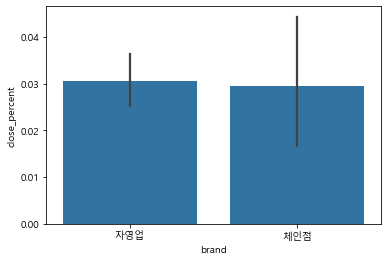

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='brand', y='close', estimator=lambda x: sum(x)/len(x))

plt.ylabel("close_percent")
plt.show()

In [16]:
market_closure = pd.crosstab(df['BZD'], df['close'])
print(market_closure)

close     0   1
BZD            
비상권    1010  37
상권     3048  90


In [17]:
chi2, p, dof, ex = chi2_contingency(market_closure)
print(f"\n[상권 vs 폐업여부] Chi2={chi2:.2f}, p-value={p:.4f}")


[상권 vs 폐업여부] Chi2=0.97, p-value=0.3253


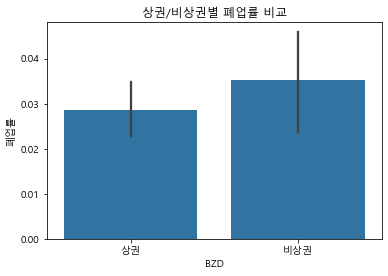

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='BZD', y='close', estimator=lambda x: sum(x)/len(x))
plt.title("상권/비상권별 폐업률 비교")
plt.ylabel("폐업률")
plt.show()

## 범주형 변수 비교, 요약통계

In [20]:
print("데이터 크기:", df.shape)
print("\n컬럼별 결측치 개수:")
print(df.isnull().sum())

print("\n기본 요약 통계 (수치형 변수):")
print(df.describe())

print("\n데이터 타입 확인:")
print(df.dtypes)


데이터 크기: (4185, 12)

컬럼별 결측치 개수:
ENCODED_MCT              0
MCT_BSE_AR               0
MCT_NM                   0
MCT_BRD_NUM           3643
MCT_SIGUNGU_NM           0
HPSN_MCT_ZCD_NM          0
HPSN_MCT_BZN_CD_NM    1047
ARE_D                    0
MCT_ME_D              4058
close                    0
brand                    0
BZD                      0
dtype: int64

기본 요약 통계 (수치형 변수):
              ARE_D      MCT_ME_D        close
count  4.185000e+03  1.270000e+02  4185.000000
mean   2.018352e+07  2.024716e+07     0.030346
std    5.743071e+04  6.859542e+03     0.171559
min    1.990023e+07  2.023010e+07     0.000000
25%    2.016032e+07  2.025017e+07     0.000000
50%    2.020073e+07  2.025072e+07     0.000000
75%    2.023033e+07  2.025080e+07     0.000000
max    2.024122e+07  2.025082e+07     1.000000

데이터 타입 확인:
ENCODED_MCT            object
MCT_BSE_AR             object
MCT_NM                 object
MCT_BRD_NUM            object
MCT_SIGUNGU_NM         object
HPSN_MCT_ZCD_NM        obj

In [21]:
for col in ['brand', 'close', 'BZD']:
    print(f"\n[{col}] 분포")
    print(df[col].value_counts(dropna=False))
    print(df[col].value_counts(normalize=True, dropna=False) * 100)


[brand] 분포
brand
자영업    3643
체인점     542
Name: count, dtype: int64
brand
자영업    87.048984
체인점    12.951016
Name: proportion, dtype: float64

[close] 분포
close
0    4058
1     127
Name: count, dtype: int64
close
0    96.965352
1     3.034648
Name: proportion, dtype: float64

[BZD] 분포
BZD
상권     3138
비상권    1047
Name: count, dtype: int64
BZD
상권     74.982079
비상권    25.017921
Name: proportion, dtype: float64


In [22]:
# 브랜드별 폐업률
brand_close = df.groupby('brand')['close'].mean().reset_index()
print("\n브랜드 여부별 폐업률:")
print(brand_close)

# 상권 여부별 폐업률
BZD_close = df.groupby('BZD')['close'].mean().reset_index()
print("\n상권 여부별 폐업률:")
print(BZD_close)


브랜드 여부별 폐업률:
  brand     close
0   자영업  0.030469
1   체인점  0.029520

상권 여부별 폐업률:
   BZD     close
0  비상권  0.035339
1   상권  0.028681


In [24]:
# 다차원 교차표 (그냥 단순 상관관계)
cross_tab = pd.crosstab([df['brand'], df['BZD']], df['close'], margins=True, normalize='index')
print("\n체인/상권별 폐업률 교차표(비율):")
print(cross_tab)



체인/상권별 폐업률 교차표(비율):
close             0         1
brand BZD                    
자영업   비상권  0.964286  0.035714
      상권   0.971241  0.028759
체인점   비상권  0.966887  0.033113
      상권   0.971867  0.028133
All        0.969654  0.030346


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

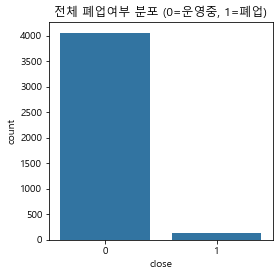

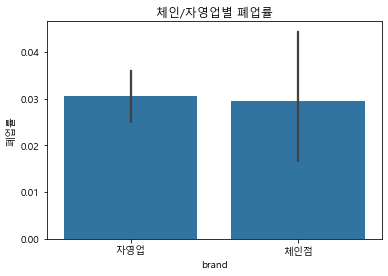

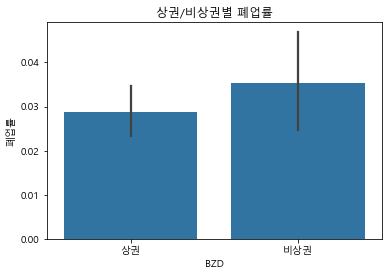

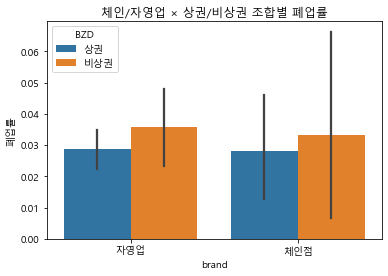

In [28]:
# 전체 폐업률
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='close')
plt.title("전체 폐업여부 분포 (0=운영중, 1=폐업)")
plt.show()

# 브랜드별 폐업률
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='brand', y='close')
plt.title("체인/자영업별 폐업률")
plt.ylabel("폐업률")
plt.show()

# 상권별 폐업률
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='BZD', y='close')
plt.title("상권/비상권별 폐업률")
plt.ylabel("폐업률")
plt.show()

# 체인+상권 조합별 폐업률
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='brand', y='close', hue='BZD')
plt.title("체인/자영업 × 상권/비상권 조합별 폐업률")
plt.ylabel("폐업률")
plt.show()